<link rel="stylesheet" href="ipython.min.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Representação de Textos
---

## Conteúdo

- Representação de Textos em Atributo-Valor
- Representações:
    - Term Frequency (TR)
    - Binary
    - Term Frequency - Inverse Document Frequency (TF-IDF)
- Indução e Avaliação de Classificadores de Texto

## Representação de Textos em Atributo-Valor

**A maior parte dos algoritmos de Machine Learning para indução de modelos preditivos trabalham a partir do formato de dados atributo-valor**

|Exemplo | Atributo 1 | Atributo 2 | ... | Atributo m | Atributo classe |
|------|------|------|------|------|------| 
|$e_1$ | $x_{1,1}$ | $x_{1,2}$ | ... | $x_{1,m}$ | $y_1$ |
|$e_2$ | $x_{2,1}$ | $x_{2,2}$ | ... | $x_{2,m}$ | $y_2$ |
| ... | ... | ... | ... | ... | ... |
|$e_n$ | $x_{n,1}$ | $x_{n,2}$ | ... | $x_{n,m}$ | $y_n$ |

- Cada exemplo é representado pelos valores de um conjunto de atrbiutos, inclusive o atributo classe

- No entanto, como já foi discutido em momento anteriores os dados textuais não estão nesse formato diretamente, pois cada exemplo de sentença é um texto e não um conjunto de atributos com seus valores.

### Transformação de um Conjunto de Sentenças em uma Tabela Atributo-Valor

No entanto, podemos representar cada sentença pelas palavras que estão contidas nela e dessa forma, usar a representação atributo-valor. Essa ideia também nos permite usar os algoritmos de Machine Learning para induzir modelos preditivos, que a partir das palavras contidas nela, consiga prever alguma classe do problema.

- Similar à tabela-atributo valor convencional, à gerada a partir de sentenças seria da seguinte forma:

|Sentença | Atributo Termo 1 | Atributo Termo 2 | ... | Atributo Termo m | Atributo classe |
|------|------|------|------|------|------| 
|$s_1$ | $x_{1,1}$ | $x_{1,2}$ | ... | $x_{1,m}$ | $y_1$ |
|$s_2$ | $x_{2,1}$ | $x_{2,2}$ | ... | $x_{2,m}$ | $y_2$ |
| ... | ... | ... | ... | ... | ... |
|$s_n$ | $x_{n,1}$ | $x_{n,2}$ | ... | $x_{n,m}$ | $y_n$ |

- onde cada linha é uma sentença e cada atributo correponde a uma termo (em geral, uma palavra) do conjunto de dados. Na última coluna também temos o atributo classe.

- Dessa forma, **cada sentença é representada por um conjunto de valores que que relacionam cada sentença com cada palavra**.

## Representações

- Term Frequency (TF): cada valor $x_{i,j}$ na tabela atributo-valor corresponde ao número de vezes que a $j$-ésima palavra está na $i$-ésima sentença.
- Binary: cada valor $x_{i,j}$ na tabela atributo-valor é 1 se $j$-ésima palavra está na $i$-ésima sentença e 0, caso contrário.
- Term Frequency - Inverse Document Frequency (TF-IDF): cada valor $x_{i,j}$ na tabela atributo-valor procura refletir quão importante é a $j$-éssima palavra para a $i$-ésima sentença dentro da coleção de sentenças.
    - Por exemplo, se uma palavra aparece em todas as instâncias (sentenças), o fato de aparecer em uma especificamente não traz muita informação.

### Representação Term Frequency (TF)

Nesta representação contabilizamos o número de vezes que cada palavra aparece em cada sentença, como segue:

|Sentença | Atributo Termo 1 | Atributo Termo 2 | ... | Atributo Termo m | Atributo classe |
|------|------|------|------|------|------| 
|$s_1$ | $x_{1,1}$ | $x_{1,2}$ | ... | $x_{1,m}$ | $y_1$ |
|$s_2$ | $x_{2,1}$ | $x_{2,2}$ | ... | $x_{2,m}$ | $y_2$ |
| ... | ... | ... | ... | ... | ... |
|$s_n$ | $x_{n,1}$ | $x_{n,2}$ | ... | $x_{n,m}$ | $y_n$ |

cada valor $x_{i,j}$ na tabela atributo-valor corresponde ao número de vezes que a $j$-ésimo termo está na $i$-ésima sentença.

**Exemplo de Implementação**

A partir de um conjunto de dados de avaliações (reviews) sobre filmes, vamos realizar a representação no formato Term Frequency (TR). As avaliações pode ser negativas (Label 0) ou positivas (Label 1).

In [40]:
import pandas as pd
data = pd.read_csv('data/imdb_labelled.txt', sep='\t')
data.head()

,Review,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


Vamos também separar 5 registros na variável `data5` para realizar testes.

In [41]:
data5 = data.head(5)
data5

,Review,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


**Classe CountVectorizer**

[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) é uma classe da biblioteca scikit-learn que permite transformar uma coleção de sentenças e transformar essa coleção em uma tabela atributo valor:

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
#countVectorizer = CountVectorizer(preprocessor=preprocessar_sentenca)

O método fit() permite que CountVectorizer conheça as palavras que estão contidas nesses textos.

In [43]:
countVectorizer.fit(data5.Review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Note que alguns parámetros do CountVectorizer são: 
- max_features: considerar as M palavras mais frequências apenas
- stop_words: passar lista de stop_words para remover
- tokenizer: passar um tokenizador, por exemplo aquele da biblioteca nltk
- preprocessor: passar uma função que realiza o pre-procesamento desejado, como a realizada na nossa avaliação.

**Lista de Palavras Presentes na Coleção de Textos**

In [44]:
print( countVectorizer.get_feature_names() )

['about', 'acting', 'aimless', 'almost', 'and', 'angles', 'anything', 'artiness', 'as', 'attempting', 'audience', 'became', 'best', 'black', 'camera', 'characters', 'clever', 'disappointed', 'distressed', 'drifting', 'even', 'existent', 'find', 'flat', 'gerardo', 'half', 'head', 'his', 'in', 'is', 'keeps', 'lines', 'little', 'lost', 'man', 'more', 'movie', 'moving', 'music', 'nearly', 'non', 'not', 'of', 'or', 'out', 'plot', 'poor', 'ridiculous', 'running', 'scene', 'slow', 'song', 'speak', 'sure', 'that', 'the', 'through', 'to', 'trying', 'very', 'walked', 'was', 'when', 'white', 'who', 'whom', 'with', 'young']


Estes termos seriam justamente o nome das colunas da nossa tabela atributo-valor para sentenças, e vamos utilizar isto em momento posterior.

**Número de vezes que cada palavra foi encontrada na Coleção de Textos**

In [45]:
countVectorizer.vocabulary_

{'very': 59,
 'slow': 50,
 'moving': 37,
 'aimless': 2,
 'movie': 36,
 'about': 0,
 'distressed': 18,
 'drifting': 19,
 'young': 67,
 'man': 34,
 'not': 41,
 'sure': 53,
 'who': 64,
 'was': 61,
 'more': 35,
 'lost': 33,
 'the': 55,
 'flat': 23,
 'characters': 15,
 'or': 43,
 'audience': 10,
 'nearly': 39,
 'half': 25,
 'of': 42,
 'whom': 65,
 'walked': 60,
 'out': 44,
 'attempting': 9,
 'artiness': 7,
 'with': 66,
 'black': 13,
 'white': 63,
 'and': 4,
 'clever': 16,
 'camera': 14,
 'angles': 5,
 'disappointed': 17,
 'became': 11,
 'even': 20,
 'ridiculous': 47,
 'as': 8,
 'acting': 1,
 'poor': 46,
 'plot': 45,
 'lines': 31,
 'almost': 3,
 'non': 40,
 'existent': 21,
 'little': 32,
 'music': 38,
 'anything': 6,
 'to': 57,
 'speak': 52,
 'best': 12,
 'scene': 49,
 'in': 28,
 'when': 62,
 'gerardo': 24,
 'is': 29,
 'trying': 58,
 'find': 22,
 'song': 51,
 'that': 54,
 'keeps': 30,
 'running': 48,
 'through': 56,
 'his': 27,
 'head': 26}

**Transformação do Conjunto no Formato Atributo-Valor**

Primeiramente vetorizamos cada um dos textos, utilizando a função `trasform`. A biblioteca usa um representação interna de tabelas esparsas (que tem pouco valores diferentes de zero)

In [46]:
data5_vectorized = countVectorizer.transform(data5.Review)
data5_vectorized

<5x68 sparse matrix of type '<class 'numpy.int64'>'
	with 79 stored elements in Compressed Sparse Row format>

No entanto, podemos visualizar os dados na sua forma densa, no formato de uma matriz, em que cada linha é uma sentença.

In [47]:
data5_vectorized.todense()

matrix([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
         0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
         1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0,
         0, 1, 1, 0, 0],
        [0, 1, 0, 1, 3, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
         0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 

Para visualizar melhor vamos mostrar isso em um DataFrame, que é o mais próximo a uma tabela atributo-valor

In [48]:
df_tf = pd.DataFrame(data = data5_vectorized.todense(), columns = countVectorizer.get_feature_names())

In [49]:
df_tf

,about,acting,aimless,almost,and,angles,anything,artiness,as,attempting,...,trying,very,walked,was,when,white,who,whom,with,young
0,1,0,1,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
2,0,1,0,1,3,1,0,1,1,1,...,0,0,0,1,0,1,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


Como exemplo, o termo **and** aparece 3 (três) vezes no terceiro texto, vejamos

In [50]:
from IPython.core.display import display, HTML
display(
    HTML(
        data5.Review[2].replace('and',  '<b>and</b>')
    )
)

Para ficar como a nossa definição anterior de tabela-atributo valor supervisonada, podemos adicionar o atributo classe `class_label`. Usamos desta forma para que não seja confundido com o termo `class`.

In [51]:
df_tf['class_label'] = data5.Label

In [52]:
df_tf

,about,acting,aimless,almost,and,angles,anything,artiness,as,attempting,...,very,walked,was,when,white,who,whom,with,young,class_label
0,1,0,1,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
2,0,1,0,1,3,1,0,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


#### Pré-processando a Sentença com CountVectorizer

In [53]:
import inspect
from helper import preprocessar_sentenca
print( inspect.getsource(preprocessar_sentenca) )

def preprocessar_sentenca(sentenca):
    """Esta função preprocessa um conjunto de sentenças

    Parameters:
    sentenca (string): uma sentenca

    Returns:
    array: um array de palavras tokens pré-processados
   """    
    x = sentenca 
    x = tokenizar(x)
    x = remover_pontuacao(x)
    x = remover_stopwords(x)
    x = aplicar_stemming(x)
    
    return ' '.join(x)



In [54]:
countVectorizer = CountVectorizer()
countVectorizer_pre = CountVectorizer(preprocessor=preprocessar_sentenca)

countVectorizer.fit(data5.Review)
countVectorizer_pre.fit(data5.Review)

print('Número de termos sem pré-processar: ', len(countVectorizer.get_feature_names()) )
print('Número de termos com pré-processar: ', len(countVectorizer_pre.get_feature_names()) )

Número de termos sem pré-processar:  68
Número de termos com pré-processar:  50


In [55]:
df_tf_pre = pd.DataFrame(
    data = countVectorizer_pre.transform(data5.Review).todense(), 
    columns = countVectorizer_pre.get_feature_names()
)

df_tf_pre

,act,aimless,almost,angl,anyth,arti,attempt,audienc,becam,best,...,slow,song,speak,sure,the,tri,veri,walk,white,young
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0


### N-Grams 

- Suponha as seguintes frases:
    - **Frase 1**: 'I hate comedian films, but I like this film' (classe Positiva)
    - **Frase 2**: 'I like comedian films, but I hate this film' (classe Negativa)
- Ao analisar as seguintes frases observamos que ambas possuem os mesmos termos, no entanto são claramente de classes diferentes.
- Devem ter observado que ao analisar a importância de cada palavra em relação à classe ou mesmo usar uma tabela atributo valor, não se tem mais ideia da ordem das palavras (apenas a presença/ausência, contagem ou importância), de cada termo no texto. Dessa forma, pela tabela atributo valor não haveria diferença entre a **Frase 1** e a **Frase 2**.
- O conceito de *N-gramas* é o considerar uma sequência de palavras como um atributo.
- Com *n-gramas* podemos analisar:
    - Os bi-gramas 'hate comedian' e 'like comedian'
    - Os tri-gramas 'like this film' e 'hate this film'
    - Isso pode trazer benefícios na análise mais completa das frases

**Exemplo de Implementação**

Vamos considerar n-gramas de tamanho 1 a 3, ou seja unigramas, bigramas e trigramas.

In [56]:
countVectorizer = CountVectorizer()
countVectorizer_ngrams = CountVectorizer( ngram_range = (1,3) )

countVectorizer.fit(data5.Review)
countVectorizer_ngrams.fit(data5.Review)

print('Número de atributos sem n-gramas: ', len(countVectorizer.get_feature_names()) )
print('Número de atributos com n-gramas (1,3): ', len(countVectorizer_ngrams.get_feature_names()) )

Número de atributos sem n-gramas:  68
Número de atributos com n-gramas (1,3):  225


Tabela no formato atributo-valor usando n-gramas

In [57]:
df_tf_ngrams = pd.DataFrame(
    data = countVectorizer_ngrams.transform(data5.Review).todense(), 
    columns = countVectorizer_ngrams.get_feature_names()
)

df_tf_ngrams

,about,about distressed,about distressed drifting,acting,acting was,acting was poor,aimless,aimless movie,aimless movie about,almost,...,who was,who was more,whom,whom walked,whom walked out,with,with black,with black white,young,young man
0,1,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Representação Binária

Nesta representação contabilizamos o número de vezes que cada palavra aparece em cada sentença, como segue:

|Sentença | Atributo Termo 1 | Atributo Termo 2 | ... | Atributo Termo m | Atributo classe |
|------|------|------|------|------|------| 
|$s_1$ | $x_{1,1}$ | $x_{1,2}$ | ... | $x_{1,m}$ | $y_1$ |
|$s_2$ | $x_{2,1}$ | $x_{2,2}$ | ... | $x_{2,m}$ | $y_2$ |
| ... | ... | ... | ... | ... | ... |
|$s_n$ | $x_{n,1}$ | $x_{n,2}$ | ... | $x_{n,m}$ | $y_n$ |

cada valor $x_{i,j}$ na tabela atributo-valor é 1 se $j$-ésima palavra está na $i$-ésima sentença e 0, caso contrário.

**Exemplo de Implementação**

In [58]:
countVectorizer_bin = CountVectorizer(binary = True )

In [59]:
countVectorizer_bin.fit(data5.Review)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Tabela no formato atributo-valor de representação binária

In [60]:
df_bin = pd.DataFrame(
    data = countVectorizer_bin.transform(data5.Review).todense(), 
    columns = countVectorizer_bin.get_feature_names()
)
df_bin

,about,acting,aimless,almost,and,angles,anything,artiness,as,attempting,...,trying,very,walked,was,when,white,who,whom,with,young
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
2,0,1,0,1,1,1,0,1,1,1,...,0,0,0,1,0,1,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


Como exemplo, o termo **and** aparece 3 (três) vezes no terceiro texto, mas na tabela atributo valor aparece apenas o valor **1 (um)**, vejamos

In [61]:
display(
    HTML(
        data5.Review[2].replace('and',  '<b>and</b>')
    )
)

**Diferença entre Representações TF e Binária**

In [62]:
pd.DataFrame(
    data = countVectorizer.transform(data5.Review)[2].todense(), 
    columns = countVectorizer.get_feature_names()
)

,about,acting,aimless,almost,and,angles,anything,artiness,as,attempting,...,trying,very,walked,was,when,white,who,whom,with,young
0,0,1,0,1,3,1,0,1,1,1,...,0,0,0,1,0,1,0,0,1,0


In [63]:
pd.DataFrame(
    data = countVectorizer_bin.transform(data5.Review)[2].todense(), 
    columns = countVectorizer_bin.get_feature_names()
)

,about,acting,aimless,almost,and,angles,anything,artiness,as,attempting,...,trying,very,walked,was,when,white,who,whom,with,young
0,0,1,0,1,1,1,0,1,1,1,...,0,0,0,1,0,1,0,0,1,0


### Representação Term Frequency - Inverse Document Frequency (TF-IDF)

Nesta representação contabilizamos o número de vezes que cada palavra aparece em cada sentença, como segue:

|Sentença | Atributo Termo 1 | Atributo Termo 2 | ... | Atributo Termo m | Atributo classe |
|------|------|------|------|------|------| 
|$s_1$ | $x_{1,1}$ | $x_{1,2}$ | ... | $x_{1,m}$ | $y_1$ |
|$s_2$ | $x_{2,1}$ | $x_{2,2}$ | ... | $x_{2,m}$ | $y_2$ |
| ... | ... | ... | ... | ... | ... |
|$s_n$ | $x_{n,1}$ | $x_{n,2}$ | ... | $x_{n,m}$ | $y_n$ |

onde cada valor $x_{i,j}$ na tabela atributo-valor procura refletir quão importante é a $j$-éssima palavra para a $i$-ésima sentença dentro da coleção de sentenças.

**Cálculo do TF-IDF**:
- **Term Frequency (TF)**: consiste no número de vezes que uma palavra aparece em um texto.
- **Inverse Document Frequency (IDF)**: consiste em medir quão importante um termo é. Ao usar TF todos os termos tem o mesmo valor. No entanto, algumas palavras como 'é', 'e', 'de', aparecem muitas vezes e tem naturalmente terão menos importância. Logo, nesta medida se abaixa a importância do termo em função de sua frequência e se aumenta em função de sua raridade.

$$IDF(term,collection)=\log\Bigg(\frac{|collection|+1}{|term~in~collection|+1}\Bigg) + 1$$
- **TF-IDF**: consiste no produto entre o TF e o IDF.

$$TF\_IDF(term,sentence,collection) = TF(term,sentence) * IDF(term,collection)$$

- Existem outras versões do cálculo de TF-IDF de acordo com propostas de diferentes artigos científicos.

**Exemplo:** suponha uma coleção de 100 sentenças sobre reviews
- Se o termo 'the' aparece em 90 de 100 sentenças, ao aparecer uma vez em uma sentença, temos:

$$
\begin{align}
TF(term,sentence) &= 1\\
IDF(term,document) &= \log\Bigg(\frac{101}{91}\Bigg) + 1 = 1.1043\\
TF\_IDF(term,sentence,document) &= 1 * 1.1043 = \textbf{1.1043}
\end{align}
$$
- Já o termo 'amazing' aparece em 10 de 100 sentenças, ao aparecer 3 vezes na sentença, temos:

$$
\begin{align}
TF(term,sentence) &= 3\\
IDF(term,document) &= \log\Bigg(\frac{101}{4}\Bigg) + 1 = 4.2288\\
TF\_IDF(term,sentence,document) &= 3 * 4.2288 = \textbf{12.6864}
\end{align}
$$
- Isso mostra que o termo 'amazing' é mais importante do que o termo 'the' para a sentença em questão

**Exemplo de Implementação 1**

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
tfidfVectorizer = TfidfVectorizer(norm=None)
data_vectorized = tfidfVectorizer.fit_transform(data5.Review)

In [66]:
df_tfidf = pd.DataFrame(data = data_vectorized.todense(), columns = tfidfVectorizer.get_feature_names())
df_tfidf

,about,acting,aimless,almost,and,angles,anything,artiness,as,attempting,...,trying,very,walked,was,when,white,who,whom,with,young
0,2.098612,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.098612,1.405465,0.000000,0.000000,2.098612,2.098612,0.000000,0.000000
2,0.000000,2.098612,0.000000,2.098612,6.295837,2.098612,0.000000,2.098612,2.098612,2.098612,...,0.000000,0.000000,0.000000,1.405465,0.000000,2.098612,0.000000,0.000000,2.098612,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,...,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.098612,0.000000,0.000000,1.405465,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000


**Exemplo de Implementação 2: dataset completo**

In [67]:
tfidfVectorizer = TfidfVectorizer(norm=None)
data_vectorized = tfidfVectorizer.fit_transform(data.Review)

In [68]:
df_tfidf = pd.DataFrame(data = data_vectorized.todense(), columns = tfidfVectorizer.get_feature_names())
df_tfidf.head()

,10,12,13,15,15pm,17,18th,1928,1947,1948,...,young,younger,your,yourself,youthful,youtube,yun,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.009301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualizando o valor de TF-IDF para uma frase

In [69]:
data.Review[7]

'Saw the movie today and thought it was a good effort, good messages for kids.  '

In [70]:
df_tfidf.iloc[[7],df_tfidf.iloc[7].to_numpy().nonzero()[0]]

,and,effort,for,good,it,kids,messages,movie,saw,the,thought,today,was
7,1.991118,6.925592,3.236712,7.580195,2.252763,5.421514,6.925592,2.720899,5.05379,1.67594,5.05379,6.009301,2.720899


## Indução e Avaliação de Classificadores

- A partir da nossa coleção de textos no formato atributo valor, seja representação TR, Binária ou TF-IDF, podemos construir classificadores de texto, e aprender padrões presentes nesse volume de dados
- Nesta aula vamos construir classificadores Random Forest, que constituem um dos classificadores mais utilizados quando temos muitas colunas de dados

### Construíndo um Classificador Random Forest

### Preparação de Dados

In [71]:
data_vectorized = countVectorizer_pre.fit_transform(data.Review)
df_tf = pd.DataFrame(data = data_vectorized.todense(), columns = countVectorizer_pre.get_feature_names())
df_tf['class_label'] = data.Label
df_tf.head()

,10,12,13,15,15pm,17,18th,1928,1947,1948,...,younger,your,youth,youtub,yun,zillion,zombi,zombie,zombiez,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df_tf.shape

(748, 3048)

O dataset tem 748 sentenças representadas por 2481 termos, mais o atributo classe, totalizando 2482.

### Separação do Conjunto de Dados em Treino e Teste

In [86]:
target = 'class_label'
X = df_tf.drop(target,axis=1)
y = df_tf[target]

Usamos 70% do conjunto de dados para treinar e avaliar nosso classificador e usaremos 30% para testá-lo.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, shuffle=True, stratify=y, random_state=1)

## Indução/Construção de Modelos

Hiperparametrizaçao: avaliaremos diferentes parâmetros do algortimo Random Forest e escolheremos a melhor configuração baseado no classificador de melhor qualidade usando 5-fold cross-validation.

In [200]:
import numpy as np
random_forest_parameters = {
        'n_estimators': list(np.arange(30, 91, 3)),        
        'max_features': ['log2'],
        'max_depth': list(np.arange(20, 41, 3)),        
        'criterion':['gini']    
    }
cv = 10

Criamos uma função para retornar os modelos construídos usando o conjunto de treinamento para escolher o melhor.

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def random_forest_tuning(X, y, cv = 5, scoring = 'accuracy', parameters=None):        
    model = RandomForestClassifier(random_state=42, class_weight='balanced')    
    grid_search_cv = GridSearchCV(
                        estimator=model, 
                        param_grid= parameters, 
                        cv=cv, n_jobs=-1, scoring=scoring, iid=False, verbose=2)    
    grid_search_cv.fit(X, y)    
    return grid_search_cv

Executamos a construção de modelos

In [202]:
random_forest = random_forest_tuning(X_train, y_train, cv = cv, parameters = random_forest_parameters)

Fitting 10 folds for each of 147 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:  5.4min finished


In [311]:
print('Modelo modelo -> score: %.3f' % random_forest.best_score_)
print('Melhor modelo -> parâmetros: ', random_forest.best_params_)

Modelo modelo -> score: 0.775
Melhor modelo -> parâmetros:  {'criterion': 'gini', 'max_depth': 38, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 87}


## Pós-processamento

In [92]:
models = {   
    'random_forest'  : random_forest,    
}

NameError: name 'random_forest' is not defined

### Medidas: Acurácia, Precision, Recall

In [126]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def model_comparison(y_true, X, models, cross_val = False, cv = 5):
    measures = {}
    for (name, model) in models.items():
        if (cross_val) :
            y_pred = cross_val_predict(model.best_estimator_, X, y_true, cv=cv, n_jobs=-1, method='predict') 
        else :
            y_pred =  model.best_estimator_.predict(X)
        acuracia = accuracy_score(y_true=y_true, y_pred=y_pred)
        report = classification_report(y_true=y_true, y_pred=y_pred, 
                                       labels=[0,1], target_names=['negativa','positiva'], 
                                       output_dict = True)
        precision = report['positiva']['precision']
        recall = report['positiva']['recall']
        measures[name] = {'acuracia' : acuracia, 'precision' : precision, 'recall' : recall}
    return pd.DataFrame(measures).T

**Avaliação no Conjunto de Treino (cross-validation)**

In [316]:
train_model_comparison = model_comparison(y_train, X_train, models, cross_val = True, cv = cv)
round(train_model_comparison,3)

,acuracia,precision,recall
random_forest,0.774,0.804,0.744


**Avaliação no Conjunto de Teste**

In [315]:
test_model_comparison = model_comparison(y_test, X_test, models)
round(test_model_comparison,3)

,acuracia,precision,recall
random_forest,0.72,0.805,0.603


**Análise da Curva Precision Recall**

In [317]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_vs_recall(precision, recall):
    plt.figure(figsize=(5,5))
    plt.plot(recall, precision, "-", linewidth=1)
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.axis([0, 1.005, 0, 1.005])
    return plt

In [318]:
best_model = models['random_forest']

No Conjunto de Treino

<module 'matplotlib.pyplot' from 'C:\\Users\\andres\\Anaconda3\\envs\\dm\\lib\\site-packages\\matplotlib\\pyplot.py'>

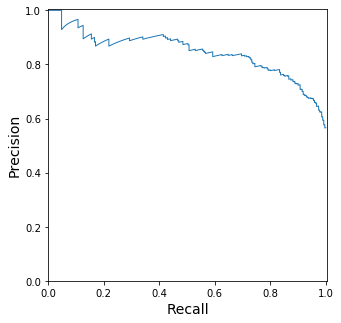

In [319]:
y_train_hatp = cross_val_predict(best_model.best_estimator_, X_train, y_train, cv=cv, n_jobs=-1, method='predict_proba')[:,1]
precision, recall, thresholds = precision_recall_curve(y_train, y_train_hatp)
plot_precision_vs_recall(precision, recall)

## Comparação das Representações em um Dataset usando Classificadores RandomForest

Função para Preparação dos Conjuntos de Dados

In [165]:
def create_dataset_from_countVectorizer(data, countVectorizer):
    data_vectorized = countVectorizer.fit_transform(data.Review)
    df = pd.DataFrame(data = data_vectorized.todense(), columns = countVectorizer.get_feature_names())
    df['class_label'] = data.Label
    return df

Parámetros do Random Forest

random_forest_parameters = {
        'n_estimators': list(np.arange(20, 51, 3)),        
        'max_features': ['log2'],
        'criterion':['gini']    
    }
cv = 10

Possíveis configurações para geração do conjunto de dados

In [199]:
representations = ['tf','bin','tfidf']
options = [['without'],['preprocessing'],['ngrams'],['preprocessing','ngrams']]

Algoritmo para avaliar todas as configurações e armazenar o resultado em um dataset

In [191]:
results = pd.DataFrame()
for representation in representations:
    for option in options:
        preprocessor = preprocessar_sentenca if 'preprocessing' in option else None
        ngram_range = (1,3) if 'ngrams' in option else (1,1)
        if representation == 'tf' :
                vectorizer = CountVectorizer(preprocessor=preprocessor, ngram_range=ngram_range)
        elif representation == 'bin' :
                vectorizer = CountVectorizer(preprocessor=preprocessor, ngram_range=ngram_range, binary = True)
        elif representation == 'tfidf' :
                vectorizer = TfidfVectorizer(preprocessor=preprocessor, ngram_range=ngram_range)            
        df = create_dataset_from_countVectorizer(data, vectorizer)
        print(df.shape)
        X = df.drop(target,axis=1)
        y = df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1)
        random_forest = random_forest_tuning(X_train, y_train, cv = cv, parameters = random_forest_parameters)
        result = model_comparison(y_train, X_train, {'random_forest' : random_forest} , cross_val = True, cv = cv)               
        result['representation'] = representation
        result['options'] = '_'.join(option)
        results = pd.concat([results, result])        

(748, 3048)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    4.7s finished


(748, 2482)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    4.4s finished


(748, 24446)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   18.0s finished


(748, 15946)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   13.3s finished


(748, 3048)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    4.9s finished


(748, 2482)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    4.5s finished


(748, 24446)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   18.0s finished


(748, 15946)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   13.8s finished


(748, 3048)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    6.6s finished


(748, 2482)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    6.5s finished


(748, 24446)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   26.6s finished


(748, 15946)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   22.9s finished


## Resultados

In [198]:
results[['representation','options','acuracia']].reset_index(drop=True)

,representation,options,acuracia
0,tf,without,0.762906
1,tf,preprocessing,0.778203
2,tf,ngrams,0.715105
3,tf,preprocessing_ngrams,0.715105
4,bin,without,0.745698
5,bin,preprocessing,0.776291
6,bin,ngrams,0.724665
7,bin,preprocessing_ngrams,0.722753
8,tfidf,without,0.747610
9,tfidf,preprocessing,0.795411
